In [1]:
import numpy as np
import pymannkendall as mk
import pandas as pd
import glob,os

In [2]:
df_summary = pd.read_csv('2group_summary.csv')

In [3]:
print(df_summary)

      begin  end  s1_er_ratio  s2_er_ratio  er_ratio_average      file
0         0   50     0.335079     0.344828          0.340956  SUEL.tsv
1        50  100     0.560847     0.636364          0.586806  SUEL.tsv
2       100  150     0.592593     0.662338          0.608069  SUEL.tsv
3       150  200     0.622951     0.668394          0.650794  SUEL.tsv
4       200  250     0.714286     0.780120          0.763514  SUEL.tsv
...     ...  ...          ...          ...               ...       ...
9058    200  250     0.806818     0.774611          0.789973  SPXX.tsv
9059    250  300     0.834906     0.771784          0.812030  SPXX.tsv
9060    300  350     0.856031     0.782609          0.811728  SPXX.tsv
9061    350  400     0.828947     0.811456          0.818811  SPXX.tsv
9062    400  414     0.844262     0.735294          0.820513  SPXX.tsv

[9063 rows x 6 columns]


In [6]:
import seaborn as sns

for i in range(0, len(df_summary)):
    if df_summary['end'].iloc[i]%50!=0:
        df_summary['er_ratio_average'].iloc[i] = None

df_summary = df_summary.dropna()
print(df_summary.head())

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


   begin  end  s1_er_ratio  s2_er_ratio  er_ratio_average      file
0      0   50     0.335079     0.344828          0.340956  SUEL.tsv
1     50  100     0.560847     0.636364          0.586806  SUEL.tsv
2    100  150     0.592593     0.662338          0.608069  SUEL.tsv
3    150  200     0.622951     0.668394          0.650794  SUEL.tsv
4    200  250     0.714286     0.780120          0.763514  SUEL.tsv


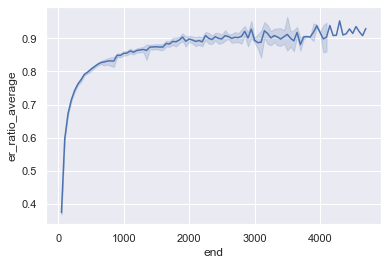

In [7]:
sns.set_theme(style="darkgrid")
sns.lineplot(x=df_summary['end'], y=df_summary['er_ratio_average'])

In [10]:
for i in range(0, len(df_summary)):
    if df_summary['end'].iloc[i]%50!=0:
        df_summary['er_ratio_average'].iloc[i] = None

df_summary = df_summary.dropna()

grouped_df = df_summary.groupby("end")
mean_df = grouped_df['er_ratio_average'].mean()

mean_df = mean_df.reset_index()
print(mean_df)

     end  er_ratio_average
0     50          0.373922
1    100          0.596616
2    150          0.672498
3    200          0.713801
4    250          0.742118
..   ...               ...
89  4500          0.914956
90  4550          0.935811
91  4600          0.920139
92  4650          0.908163
93  4700          0.929936

[94 rows x 2 columns]


/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [5]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Average ER ratio')

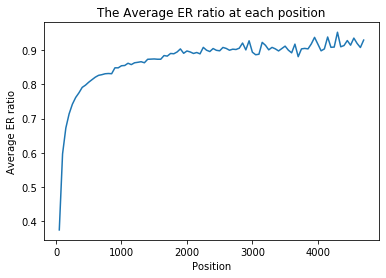

In [6]:
l1=plt.plot(mean_df['end'],mean_df['er_ratio_average'],label='type1')
plt.title('The Average ER ratio at each position')
plt.xlabel('Position')
plt.ylabel('Average ER ratio')

In [ ]:
plt.show()

In [2]:
er_file = glob.glob("S***.csv")

In [3]:
dl_er = []
out = []
for f in er_file:
    dl_er.append(pd.read_csv(f))

for x in dl_er:
    if len(x)>8:
        x = x.drop(index=[len(x)-1])
        out.append(mk.original_test(x['er_ratio_average']))

In [4]:
print(len(dl_er))
print(len(out))
c = 0
for o in out:
    if o.trend == "increasing":
        c = c+1
print(c)
print(310/412)

622
412
410
0.7524271844660194


In [5]:
df = pd.concat(dl_er)
df.to_csv('2group_summary.csv', index = False)

NameError: name 'df' is not defined

In [10]:
dl_er2 = []
for q in dl_er:
    if len(q)>16 and len(q)<24:
        dl_er2.append(q)
df2 = pd.concat(dl_er2)
df2.to_csv('2group_2.csv', index = False)

In [6]:
import numpy as np
import statsmodels.api as sm
from scipy import stats
from matplotlib import pyplot as plt

plt.rc("figure", figsize=(16,8))
plt.rc("font", size=14)

In [7]:
glm_binom = sm.GLM(df['end'], df['er_ratio_average'], family=sm.families.Binomial())

In [9]:
res = glm_binom.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                    end   No. Observations:                 9063
Model:                            GLM   Df Residuals:                     9062
Model Family:                Binomial   Df Model:                            0
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Mon, 26 Apr 2021   Deviance:                   4.7397e+08
Time:                        01:48:40   Pearson chi2:                 2.99e+25
No. Iterations:                     2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
er_ratio_average  6.545e+18   1.08e+06  

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/genmod/families/family.py:894: RuntimeWarning: divide by zero encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/genmod/families/family.py:946: RuntimeWarning: divide by zero encountered in true_divide
  special.gammaln(n - y + 1) + y * np.log(mu / (1 - mu)) +
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/genmod/families/family.py:946: RuntimeWarning: invalid value encountered in add
  special.gammaln(n - y + 1) + y * np.log(mu / (1 - mu)) +
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/genmod/families/family.py:947: RuntimeWarning: divide by zero encountered in log
  n * np.log(1 - mu)) * var_weights


In [11]:
print(len(dl_er))

622
